In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

## Prepare the data

Read in the national park data and prepare your data from your models. We want our target variable to be ParkName, and all other variables in the table above to be our features. Then, split and scale the data.

In [4]:
# Read the data
nps_df = pd.read_csv('data/nps.csv')
nps_df.head()

,ParkCode,ParkName,CategoryName,Order,Family,TaxonRecordStatus,SciName,CommonNames,ParkAccepted,Sensitive,...,ParkTags,References,Observations,Vouchers,ExternalLinks,TEStatus,StateStatus,OzoneSensitiveStatus,GRank,SRank
0,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Alces alces,Moose,True,False,...,NaN,11,1,0,NaN,50,NaN,NaN,G5,ME: S5
1,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Odocoileus virginianus,"Northern White-tailed Deer, Virginia Deer, Whi...",True,False,...,NaN,20,0,0,NaN,50,NaN,NaN,G5,ME: S5
2,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis latrans,"Coyote, Eastern Coyote",True,False,...,NaN,8,1,0,NaN,SC,NaN,NaN,G5,ME: S5
3,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",True,False,...,NaN,2,0,0,NaN,E,NaN,NaN,G5,ME: SH
4,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",True,False,...,NaN,16,0,0,NaN,NaN,NaN,NaN,G5,ME: S5


## Data Pre Processing

### Encode categorical variables:

In [5]:
for col in ["CategoryName", "Order", "Family", "GRank", "ParkName", "Sensitive", "Nativeness", "Observations"]:
    nps_df[f"{col}_cat"] = nps_df[col].astype('category').cat.codes

In [7]:
nps_df.columns

Index(['ParkCode', 'ParkName', 'CategoryName', 'Order', 'Family',
       'TaxonRecordStatus', 'SciName', 'CommonNames', 'ParkAccepted',
       'Sensitive', 'RecordStatus', 'Occurrence', 'OccurrenceTags',
       'Nativeness', 'NativenessTags', 'Abundance', 'NPSTags', 'ParkTags',
       'References', 'Observations', 'Vouchers', 'ExternalLinks', 'TEStatus',
       'StateStatus', 'OzoneSensitiveStatus', 'GRank', 'SRank',
       'CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
       'ParkName_cat', 'Sensitive_cat', 'Nativeness_cat', 'Observations_cat'],
      dtype='object')

## Split and scale data

In [9]:
# Split data into X and y
X = nps_df[["CategoryName_cat", "Order_cat", "Family_cat", "GRank_cat",
            "Sensitive_cat", "Nativeness_cat", "Observations_cat"]]
y = nps_df["ParkName_cat"]


In [11]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN model

In [15]:
# Initialize KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [16]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.553746727748691


## Visualize KNN results

In [25]:
def knn(): 
    
    k_values = [3,5,7,9,11] 
    accuracies=[]
    
    # Loop through different k values and fit a model/obtain accuaracy
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)  
        knn.fit(X_train_scaled, y_train)
        
        # Make predictions and calculate accuracy
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"K = {k} - Accuracy: {accuracy:.3f}")
        
# Visualize the effect of K on accuracy

    plt.figure(figsize=(10,6))
    plt.plot(k_values, accuracies, color='blue', linestyle='dashed', marker='o')
    plt.title('KNN: Effect of K on Model Accuracy')
    plt.xlabel('Number of Neights (K)')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

K = 3 - Accuracy: 0.556
K = 5 - Accuracy: 0.554
K = 7 - Accuracy: 0.555
K = 9 - Accuracy: 0.555
K = 11 - Accuracy: 0.559


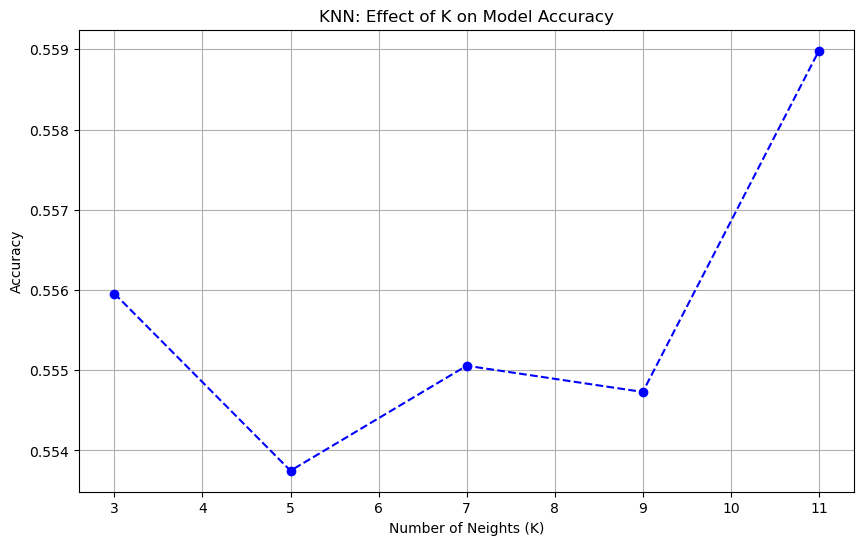

In [26]:
knn()

## Decision Tree Model

In [27]:
# Initialzie Decision Tree classifier

In [28]:
# Calculate accuracies

## Tune Model

In [29]:
def decision_tree():
    
    # Different possible max depths
    max_depths = [2,3,4,5]
    accuracies = []
    
    # Loop through different max depths and run a DT model/ report accuracies
    for depth in max_depths:
        dt = DecisionTreeClassifier(max_depth=depth)
        dt.fit(X_train_scaled, y_train)
        y_pred = dt.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Max Depth = {depth} - Accuracy: {accuracy:.3f}")

In [30]:
decision_tree()

Max Depth = 2 - Accuracy: 0.464
Max Depth = 3 - Accuracy: 0.496
Max Depth = 4 - Accuracy: 0.512
Max Depth = 5 - Accuracy: 0.530


## Visualize Model

In [32]:
# Visualize the best performing tree
dt_best = DecisionTreeClassifier(max_depth=5)
dt_best.fit(X_train_scaled, y_train)

# Create the mapping from numeric classes to descriptive names
class_mapping = dict(zip(dt_best.classes_, nps_df['ParkName'].unique()))

# Convert class labels in dt.classes_ to strings using the mapping
class_names_str = [class_mapping[cls] for cls in dt_best.classes_]

# Plot the decision tree
plt.figure(figsize=(12,15), dpi = 700)
plot_tree(dt_best, feature_names=X.columns, class_names=class_names_str,
          filled=True, rounded =True)

plt.title("Decision Tree with Max Depth of 5")

Text(0.5, 1.0, 'Decision Tree with Max Depth of 5')

In [34]:
# Look more closely at node values
dt_best.tree_.value[2]

array([[1135., 1038., 1552., 2008., 2062., 1352., 2056., 1306., 1946.,
        1137.,  407., 1390., 2055., 1387., 1430.]])

## Find important features

In [ ]:
# Feature importance 
dt_best.feature_importances_